In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as smodels
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.ensemble import AdaBoostClassifier

In [43]:
df=pd.read_csv('C:/Users/Naman/Downloads/naman python/ana lytics/loan prediction/train_ctrUa4K (2).csv')
df.head()      

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
df.shape

(614, 13)

In [45]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [46]:
cat=df.select_dtypes(include='object')
cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


<AxesSubplot:>

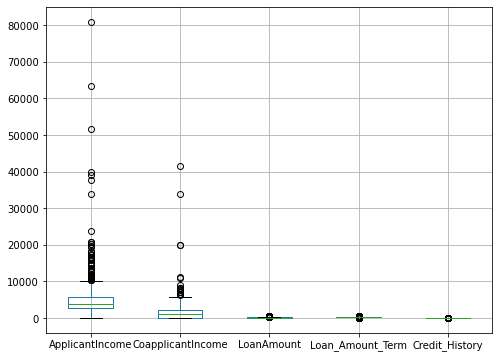

In [47]:
plt.figure(figsize=[8,6])
df.boxplot()

In [48]:
num=df.select_dtypes(exclude='object')
num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

<AxesSubplot:>

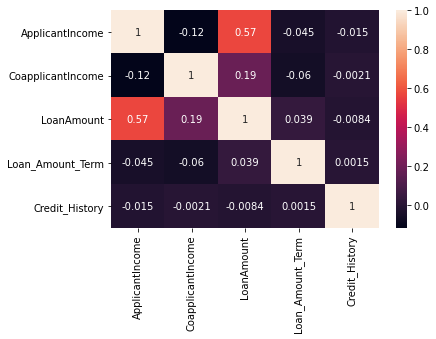

In [49]:
sns.heatmap(df.corr(),annot=True)

In [50]:
#No multi colinearity Present 

In [51]:
df.isnull().sum()/len(df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [52]:
df.shape

(614, 13)

In [53]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [55]:
#df['Loan_Status']=pd.get_dummies(df['Loan_Status'],drop_first=True)
df['Loan_Status']=pd.get_dummies(df['Loan_Status'],drop_first=True)

In [210]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [57]:
df.set_index('Loan_ID',inplace=True)

In [58]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']
from xverse.transformer import WOE
clf = WOE()
clf.fit(X, y)

WOE(mono_custom_binning={'ApplicantIncome': array([  150.        ,  3166.        ,  4863.33333333, 81000.        ]),
                         'CoapplicantIncome': array([    0.,  1943., 41667.]),
                         'Credit_History': array([ 0.,  1., nan]),
                         'LoanAmount': array([  9., 110., 151., 700.]),
                         'Loan_Amount_Term': array([ 12., 360., 480.])},
    woe_bins={'ApplicantIncome': {Interval(149.999, 3166.0, closed='right'): 0.039168631176237693,
                                  Interval(316...
                                   Interval(360.0, 480.0, closed='right'): -1.1929750501163947,
                                   'NA': -0.49982786955644926},
              'Married': {'NA': 0.0, 'No': -0.25911799452434037,
                          'Yes': 0.13759141954807988},
              'Property_Area': {'Rural': -0.3211360808130733,
                                'Semiurban': 0.41089181726825036,
                                'Ur

In [62]:
X.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban


In [64]:
X=clf.transform(X)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,0.027855,-0.259118,0.011932,0.099793,-0.006025,-0.020255,-0.046294,-0.787510,0.047607,0.572673,-0.131267
LP001003,0.027855,0.137591,-0.181374,0.099793,-0.006025,-0.019139,-0.046294,0.250478,0.047607,0.572673,-0.321136
LP001005,0.027855,0.137591,0.011932,0.099793,-0.020255,0.039169,-0.046294,0.019830,0.047607,0.572673,-0.131267
LP001006,0.027855,0.137591,0.011932,-0.332034,-0.006025,0.039169,0.094879,0.250478,0.047607,0.572673,-0.131267
LP001008,0.027855,-0.259118,0.011932,0.099793,-0.006025,-0.020255,-0.046294,0.250478,0.047607,0.572673,-0.131267


In [116]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=20)
clf = WOE()
clf.fit(Xtrain, ytrain)
Xtrain = clf.transform(Xtrain)
Xtest = clf.transform(Xtest)
Rfc=RandomForestClassifier(class_weight='balanced')
Rfc_model=Rfc.fit(Xtrain,ytrain)

y_pred=Rfc_model.predict(Xtest)

print(classification_report(ytest,y_pred))
print()

print('RFC score ',np.mean(cross_val_score(Rfc,Xtrain,ytrain,cv=5)))
print()
print(confusion_matrix(ytest,y_pred))


print('train score ',dc_model.score(Xtrain,ytrain))

print('test score ',dc_model.score(Xtest,ytest))

              precision    recall  f1-score   support

           0       0.80      0.47      0.59        51
           1       0.71      0.92      0.80        72

    accuracy                           0.73       123
   macro avg       0.75      0.69      0.70       123
weighted avg       0.75      0.73      0.71       123


RFC score  0.78008658008658

[[24 27]
 [ 6 66]]
train score  0.7739307535641547
test score  0.6178861788617886


In [78]:
param=[{'criterion' :['entropy', 'gini'],
'n_estimators' : [ 150,180],
'max_depth' : [ 15,20],
'min_samples_split' : [2, 5, 8]}]

from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=Rfc,param_grid=param)
grid_model=grid.fit(Xtrain,ytrain)

grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 5,
 'n_estimators': 180}

# Tuned Model -Random Forest 

In [117]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=20)
clf = WOE()
clf.fit(Xtrain, ytrain)
Xtrain = clf.transform(Xtrain)
Xtest = clf.transform(Xtest)
Rfc=RandomForestClassifier(criterion='entropy',max_depth=20,min_samples_split=5,n_estimators=180, class_weight='balanced')
Rfc_model=Rfc.fit(Xtrain,ytrain)

y_pred=Rfc_model.predict(Xtest)

print(classification_report(ytest,y_pred))
print()

print('RFC score ',np.mean(cross_val_score(Rfc,Xtrain,ytrain,cv=5)))
print()
print(confusion_matrix(ytest,y_pred))


print('train score ',dc_model.score(Xtrain,ytrain))

print('test score ',dc_model.score(Xtest,ytest))

              precision    recall  f1-score   support

           0       0.81      0.49      0.61        51
           1       0.72      0.92      0.80        72

    accuracy                           0.74       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.75      0.74      0.72       123


RFC score  0.7719645433931148

[[25 26]
 [ 6 66]]
train score  0.7739307535641547
test score  0.6178861788617886


# Using Logistic regression

# Using Decision Tree 

In [87]:
from sklearn.tree import DecisionTreeClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=20)
clf = WOE()
clf.fit(Xtrain, ytrain)
Xtrain = clf.transform(Xtrain)
Xtest = clf.transform(Xtest)

dc=DecisionTreeClassifier(random_state=20)
dc_model=dc.fit(Xtrain,ytrain)

y_pred=dc_model.predict(Xtest)

print(classification_report(ytest,y_pred))
print()

print('RFC score ',np.mean(cross_val_score(Rfc,Xtrain,ytrain,cv=5)))
print()
print(confusion_matrix(ytest,y_pred))

print('train score ',dc_model.score(Xtrain,ytrain))

print('test score ',dc_model.score(Xtest,ytest))

              precision    recall  f1-score   support

           0       0.66      0.45      0.53        51
           1       0.68      0.83      0.75        72

    accuracy                           0.67       123
   macro avg       0.67      0.64      0.64       123
weighted avg       0.67      0.67      0.66       123


RFC score  0.7740053597196455

[[23 28]
 [12 60]]
train score  0.9531568228105907
test score  0.6747967479674797


# Using Adabosst  Clasifier 

In [88]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=20)
clf = WOE()
clf.fit(Xtrain, ytrain)
Xtrain = clf.transform(Xtrain)
Xtest = clf.transform(Xtest)

abc=AdaBoostClassifier(random_state=20)
abc_model=abc.fit(Xtrain,ytrain)

y_pred=abc_model.predict(Xtest)

print(classification_report(ytest,y_pred))
print()

print('RFC score ',np.mean(cross_val_score(Rfc,Xtrain,ytrain,cv=5)))
print()
print(confusion_matrix(ytest,y_pred))

print('train score ',dc_model.score(Xtrain,ytrain))

print('test score ',dc_model.score(Xtest,ytest))

              precision    recall  f1-score   support

           0       0.96      0.43      0.59        51
           1       0.71      0.99      0.83        72

    accuracy                           0.76       123
   macro avg       0.83      0.71      0.71       123
weighted avg       0.81      0.76      0.73       123


RFC score  0.765842094413523

[[22 29]
 [ 1 71]]
train score  0.9531568228105907
test score  0.6747967479674797


# Using XGBoosT 

In [89]:
from xgboost import XGBClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=20)
clf = WOE()
clf.fit(Xtrain, ytrain)
Xtrain = clf.transform(Xtrain)
Xtest = clf.transform(Xtest)

xgb=XGBClassifier(random_state=20)
xgb_model=xgb.fit(Xtrain,ytrain)
y_pred=xgb_model.predict(Xtest)

print(classification_report(ytest,y_pred))
print()

print('RFC score ',np.mean(cross_val_score(Rfc,Xtrain,ytrain,cv=5)))
print()
print(confusion_matrix(ytest,y_pred))

print('train score ',dc_model.score(Xtrain,ytrain))

print('test score ',dc_model.score(Xtest,ytest))

[21:38:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.76      0.49      0.60        51
           1       0.71      0.89      0.79        72

    accuracy                           0.72       123
   macro avg       0.73      0.69      0.69       123
weighted avg       0.73      0.72      0.71       123


RFC score  0.7821067821067821

[[25 26]
 [ 8 64]]
train score  0.9531568228105907
test score  0.6747967479674797


In [90]:
params=({'n_estimators' : [100, 120, 150],
    'learning_rate' :[0.1, 0.01, 0.001, 0.15, 0.015], 
    'gamma' : [2, 3, 4, 5, 6],
    'max_depth' : [2, 3, 4, 5, 6]})

In [91]:
grid=GridSearchCV(estimator=xgb,param_grid=param,cv=3,n_jobs=-1)
grid_model=grid.fit(Xtrain,ytrain)
grid_model.best_params_

[21:39:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:39:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_split': 2,
 'n_estimators': 150}

In [95]:
xgb1=XGBClassifier(random_state=10,criterion='entropy',max_depth=15,min_samples_split=2, n_estimators=150)

xgb1_model1=xgb1.fit(Xtrain,ytrain)

y_pred04=xgb1_model1.predict(Xtest)

print(classification_report(ytest,y_pred04))
print()

print('RFC score ',np.mean(cross_val_score(Rfc,Xtrain,ytrain,cv=5)))
print()
print(confusion_matrix(ytest,y_pred))

print('train score ',dc_model.score(Xtrain,ytrain))

print('test score ',dc_model.score(Xtest,ytest))

[21:42:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "criterion", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:42:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.75      0.47      0.58        51
           1       0.70      0.89      0.79        72

    accuracy                           0.72       123
   macro avg       0.73      0.68      0.68       123
weighted

# Using Stacking classfier 

In [96]:
from sklearn.ensemble import StackingClassifier

base_learners = [('dt_model',DecisionTreeClassifier()),
                 ('rf_model',RandomForestClassifier())]

stack=StackingClassifier(estimators=base_learners,final_estimator=AdaBoostClassifier())

sc_model=stack.fit(Xtrain,ytrain)

In [98]:
stack=StackingClassifier(estimators=base_learners,final_estimator=AdaBoostClassifier())

sc_model=stack.fit(Xtrain,ytrain)

y_pred=sc_model.predict(Xtest)
print(classification_report(ytest,y_pred))
print()

print('RFC score ',np.mean(cross_val_score(Rfc,Xtrain,ytrain,cv=5)))
print()
print(confusion_matrix(ytest,y_pred))

print('train score ',dc_model.score(Xtrain,ytrain))

print('test score ',dc_model.score(Xtest,ytest))


              precision    recall  f1-score   support

           0       0.90      0.37      0.53        51
           1       0.69      0.97      0.80        72

    accuracy                           0.72       123
   macro avg       0.80      0.67      0.67       123
weighted avg       0.78      0.72      0.69       123


RFC score  0.7760049474335189

[[19 32]
 [ 2 70]]
train score  0.9531568228105907
test score  0.6747967479674797


# Test Data

In [180]:
test=pd.read_csv('C:/Users/Naman/Downloads/naman python/ana lytics/loan prediction/test_lAUu6dG (2).csv')
test.set_index('Loan_ID',inplace=True)              

In [181]:
test["ApplicantIncome"] = pd.to_numeric(test["ApplicantIncome"])
test.loc[test['ApplicantIncome']=='NA','ApplicantIncome']=np.nan

In [182]:
test.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [183]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']
from xverse.transformer import WOE
clf = WOE()
clf.fit(X, y)

WOE(mono_custom_binning={'ApplicantIncome': array([  150.        ,  3166.        ,  4863.33333333, 81000.        ]),
                         'CoapplicantIncome': array([    0.,  1943., 41667.]),
                         'Credit_History': array([ 0.,  1., nan]),
                         'LoanAmount': array([  9., 110., 151., 700.]),
                         'Loan_Amount_Term': array([ 12., 360., 480.])},
    woe_bins={'ApplicantIncome': {Interval(149.999, 3166.0, closed='right'): 0.039168631176237693,
                                  Interval(316...
                                   Interval(360.0, 480.0, closed='right'): -1.1929750501163947,
                                   'NA': -0.49982786955644926},
              'Married': {'NA': 0.0, 'No': -0.25911799452434037,
                          'Yes': 0.13759141954807988},
              'Property_Area': {'Rural': -0.3211360808130733,
                                'Semiurban': 0.41089181726825036,
                                'Ur

In [184]:
X_test_=clf.transform(test)

In [185]:
X_test_.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [186]:
X_test_.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,0.027855,0.137591,0.011932,0.099793,-0.006025,-0.020255,-0.046294,0.019830,0.047607,0.572673,-0.131267
LP001022,0.027855,0.137591,-0.181374,0.099793,-0.006025,0.039169,-0.046294,0.250478,0.047607,0.572673,-0.131267


In [187]:
X_test_.loc[X_test_['ApplicantIncome']=='NA','ApplicantIncome']=np.nan
X_test_["ApplicantIncome"] = pd.to_numeric(X_test_["ApplicantIncome"])

In [199]:
X_test_["ApplicantIncome"]=X_test_["ApplicantIncome"].fillna(np.mean(X_test_["ApplicantIncome"]))

In [200]:
X_test_.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Random Forest Model

In [201]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=20)
clf = WOE()
clf.fit(Xtrain, ytrain)
Xtrain = clf.transform(Xtrain)
Xtest = clf.transform(Xtest)
Rfc=RandomForestClassifier(criterion='entropy',max_depth=20,min_samples_split=5,n_estimators=180, class_weight='balanced')
Rfc_model=Rfc.fit(Xtrain,ytrain)


In [202]:

y_pred_Final =Rfc_model.predict(X_test_)


In [205]:
pd.Series(y_pred_Final).value_counts()

1    267
0    100
dtype: int64

In [215]:
df_final=pd.DataFrame({'Loan_ID':test.index,'Loan_Status':y_pred_Final})
df_final['Loan_Status']=df_final['Loan_Status'].map({1:'Y',0:'N'})

In [216]:
df_final

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,N


In [218]:
df_final.to_csv('Final_Status.csv')

